In [1]:
# Load and Clean Data
import pandas as pd

df = pd.read_csv('full_grouped.csv', parse_dates=['Date'])
df.fillna(0, inplace=True)  # replace missing values with 0
df.drop_duplicates(inplace=True)

In [4]:
# Aggregate Data
country_df = df.groupby(['Date','Country/Region'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
top_countries = country_df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5).index
top_df = country_df[country_df['Country/Region'].isin(top_countries)]

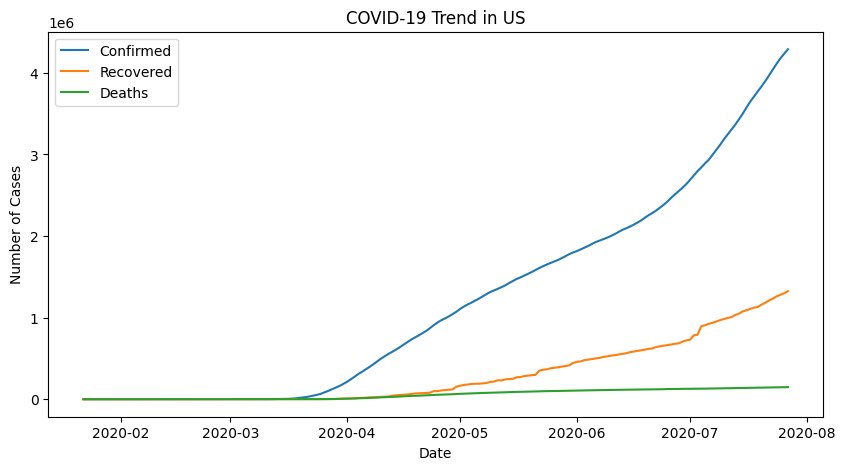

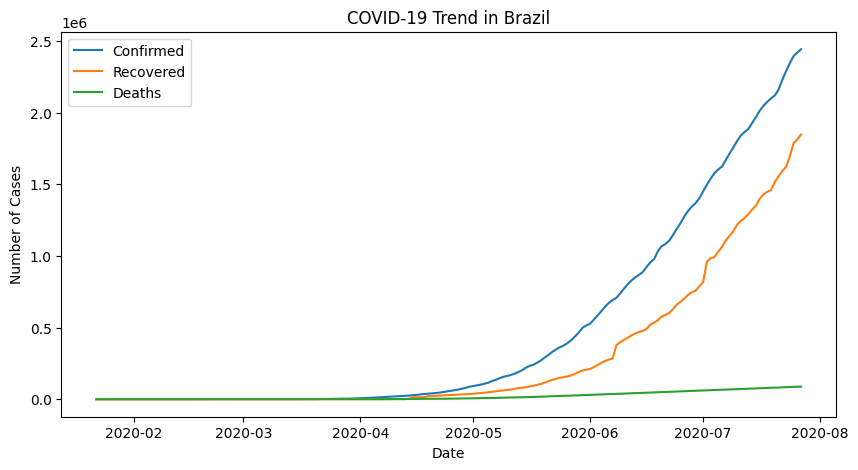

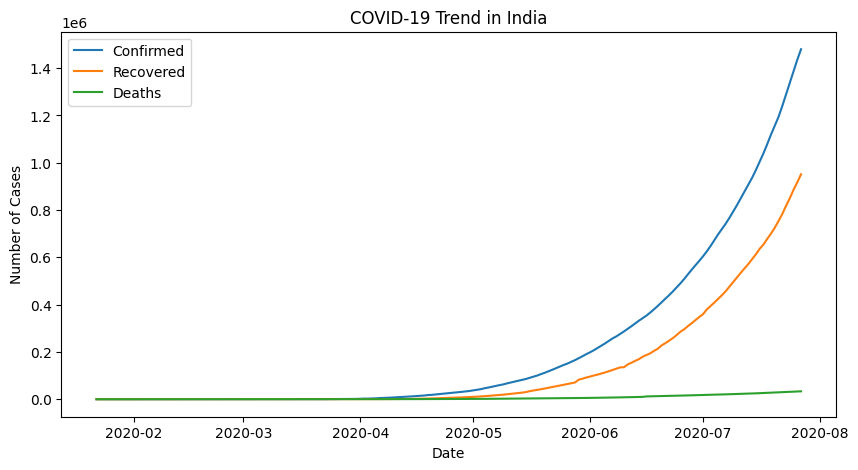

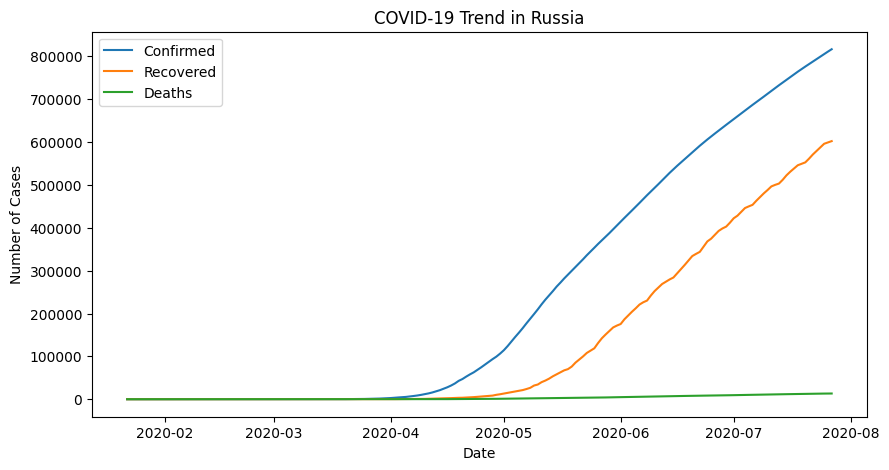

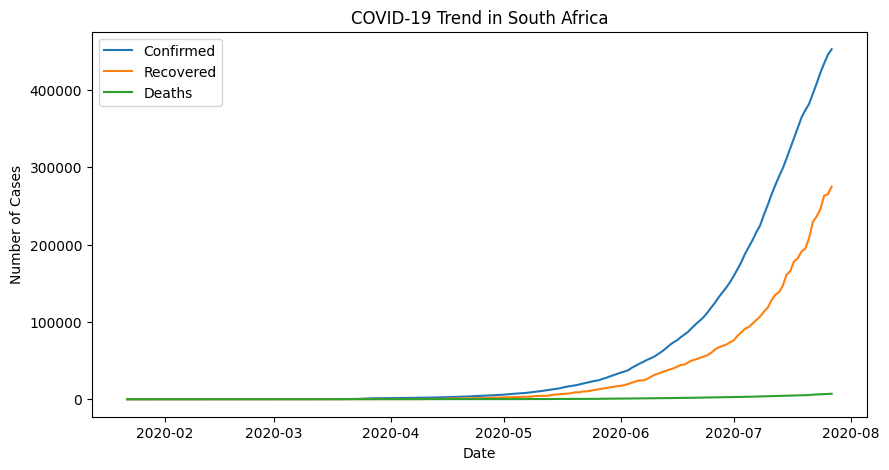

In [ ]:
#Visualizations

# A.Line Plots for Trends
import matplotlib.pyplot as plt

for country in top_countries:
    temp = top_df[top_df['Country/Region']==country]
    plt.figure(figsize=(10,5))
    plt.plot(temp['Date'], temp['Confirmed'], label='Confirmed')
    plt.plot(temp['Date'], temp['Recovered'], label='Recovered')
    plt.plot(temp['Date'], temp['Deaths'], label='Deaths')
    plt.title(f'COVID-19 Trend in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

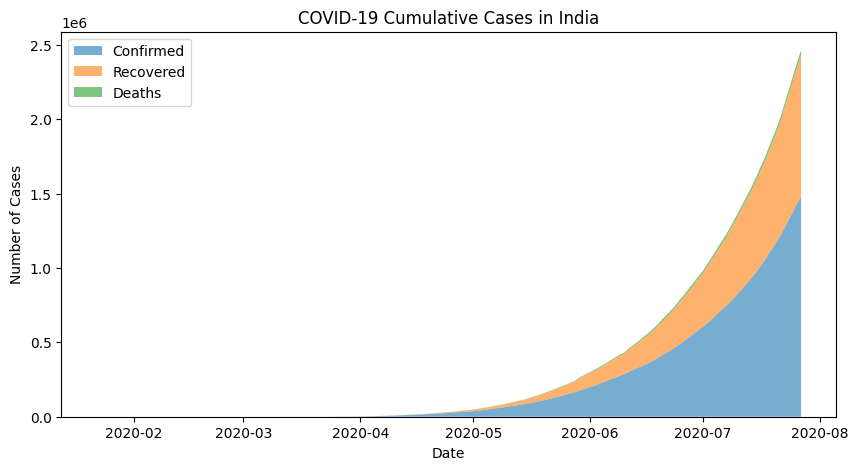

In [ ]:
# B.Area Charts

temp = top_df[top_df['Country/Region']=='India']
plt.figure(figsize=(10,5))
plt.stackplot(temp['Date'], temp['Confirmed'], temp['Recovered'], temp['Deaths'], labels=['Confirmed','Recovered','Deaths'], alpha=0.6)
plt.legend(loc='upper left')
plt.title('COVID-19 Cumulative Cases in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

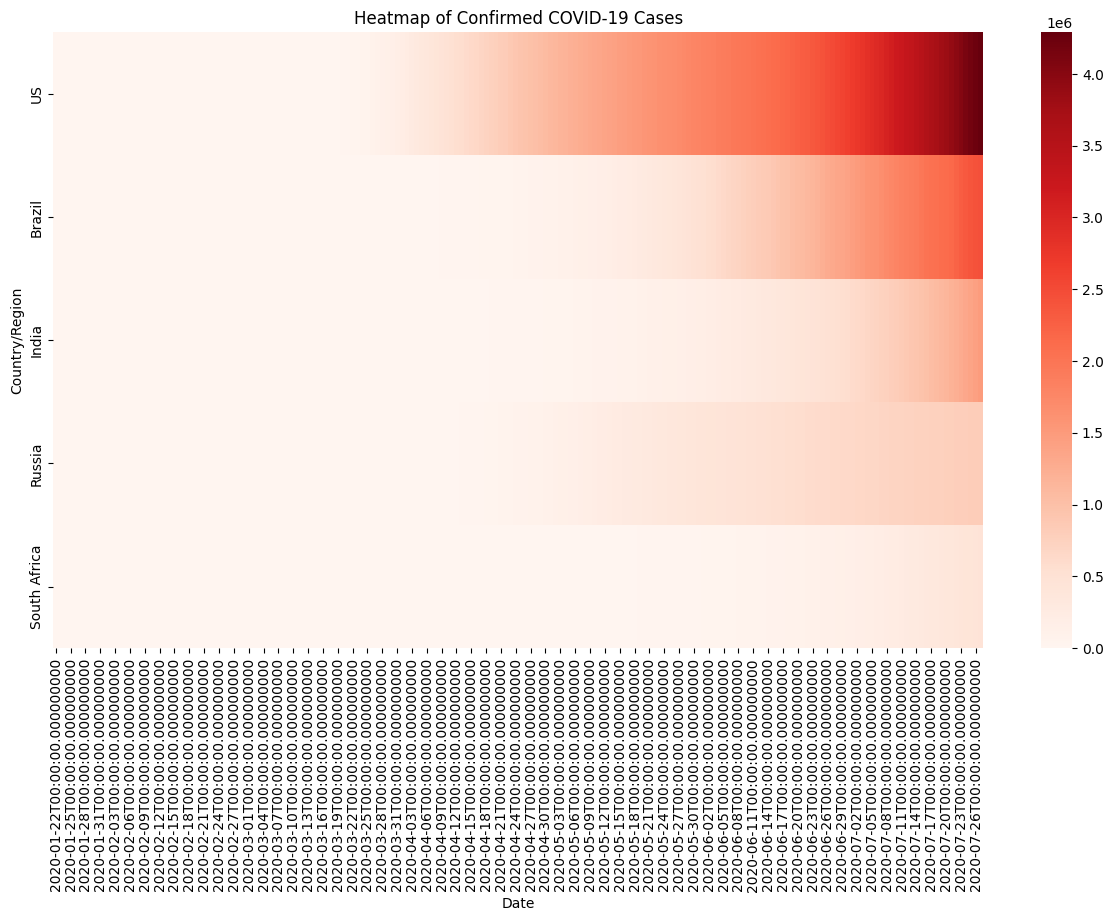

In [ ]:
# C.Heatmap

import seaborn as sns

# Pivot data: countries vs date
heat_df = country_df.pivot(index='Country/Region', columns='Date', values='Confirmed')
plt.figure(figsize=(15,8))
sns.heatmap(heat_df.loc[top_countries], cmap='Reds')
plt.title('Heatmap of Confirmed COVID-19 Cases')
plt.show()

In [ ]:
# Analysis and Insights
region_df = df.groupby(['Country/Region','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
print(region_df.head())

  Country/Region       Date  Confirmed  Deaths  Recovered
0    Afghanistan 2020-01-22          0       0          0
1    Afghanistan 2020-01-23          0       0          0
2    Afghanistan 2020-01-24          0       0          0
3    Afghanistan 2020-01-25          0       0          0
4    Afghanistan 2020-01-26          0       0          0
